In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import pickle as pkl

(60000, 2) (140000, 2)
0.3 0.7


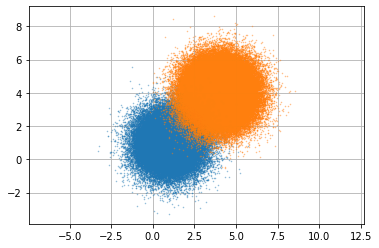

[[1 1]
 [4 4]] [[[1 0]
  [0 1]]

 [[1 0]
  [0 1]]] [0.3 0.7] [-0.26141452  1.98797281]


In [12]:
mean1 = [1,1]
cov1 = [[1,0],[0,1]]
mean2 = [4,4]
cov2 = [[1,0],[0,1]]

try:
    with open('q1.pickle', 'rb') as handle:
        b = pkl.load(handle)
        X,y=b
except:
    data1 = np.random.multivariate_normal(mean1, cov1, 60000)
    y1 = np.zeros(60000)
    data2 = np.random.multivariate_normal(mean2, cov2, 140000)
    y2 = np.ones(140000)
    X =np.vstack((data1,data2))
    y =np.hstack((y1,y2))
    with open('q1.pickle', 'wb') as handle:
        pkl.dump([X,y], handle, protocol=pkl.HIGHEST_PROTOCOL)

# sort data into classes
Xy0 = X[y == 0]
Xy1 = X[y == 1]
print(Xy0.shape, Xy1.shape)
# calculate priors
prior1 = len(Xy0) / len(X)
prior2 = len(Xy1) / len(X)
print(prior1, prior2)
### code for plotting
plt.plot(Xy0[:, 0], Xy0[:, 1], '.', alpha=0.5, markersize=1)
plt.plot(Xy1[:, 0], Xy1[:, 1], '.', alpha=0.5, markersize=1)
plt.axis('equal')
plt.grid()
plt.show()

mus=np.array([mean1,mean2])
sigmas=np.array([cov1,cov2])
priors=np.array([prior1,prior2])
print(mus,sigmas,priors,X[100])

In [13]:
class multi_case_1():
    def __init__ (self,mus,sigmas,priors):
        self.mus=mus
        self.sigmas=sigmas
        self.priors=priors
        values=self.calculate_case_1()
        print(f"Paramter Values calculated: ", values)
        return None
    
    def calculate_case_1(self):
        mu_diff=(self.mus[0]-self.mus[1])
        self.w= mu_diff
        self.x0= 1/2 * (self.mus[0]+self.mus[1]) - (self.sigmas[0][0]**2)/(np.linalg.norm(mu_diff))*(math.log(priors[0]/priors[1])*mu_diff)
        return self.w,self.x0
    
    def decision_boundry_fn(self,x):
        return np.matmul(self.w.T, (x-self.x0))
    
    def predict(self,X):
        op_data=[np.matmul(self.w.T, (x-self.x0)) for x in X]
        to_ret=[0 if x>0 else 1 for x in op_data]
        return np.array(to_ret)

In [14]:
model1=multi_case_1(mus,sigmas,priors)

Paramter Values calculated:  (array([-3, -3]), array([1.90086994, 2.5       ]))


shape of x_in, (1000000, 2)
doing binary classifcation...


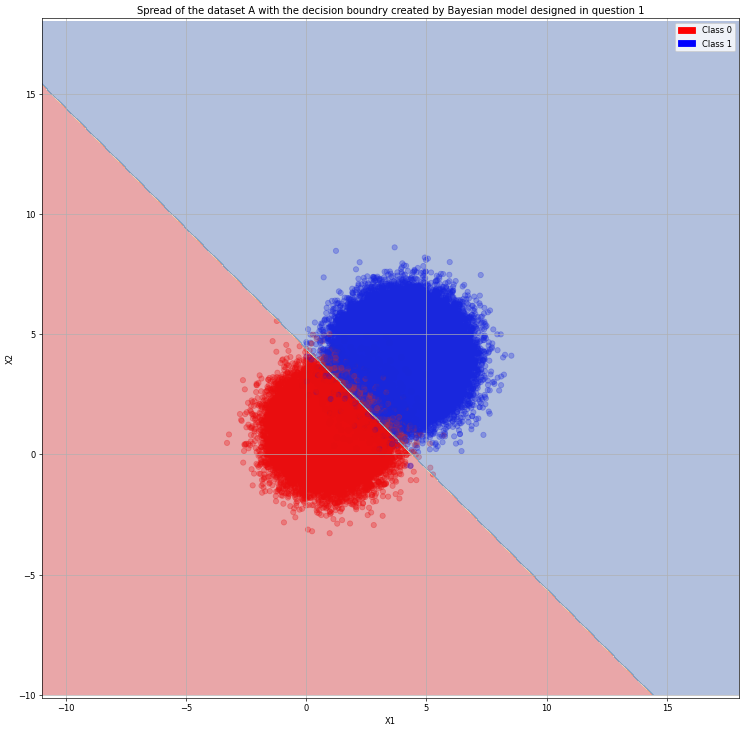

In [18]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    
    x_min, x_max = -11,18
    y_min, y_max = -10,18
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                         np.linspace(y_min, y_max, 1000))
    
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    
    # Make predictions using the trained model
    print(f"shape of x_in, {x_in.shape}")
    y_pred = model.predict(x_in)
    y_pred=[[x] for x in y_pred]
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot decision boundary
    plt.figure(figsize=(15,15), dpi=60)
    p=np.concatenate((X.T,np.array([y])),axis=0).T
    np.random.shuffle(p)
    color= ['red' if l == 0 else 'blue' for l in p[:,2]]
    plt.scatter(p[:, 0], p[:, 1], s=40, color=color, alpha=0.3)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.4)
#     plt.scatter([1],[1], s=20, color=["green"], alpha=1)
#     plt.scatter([4],[4], s=20, color=["yellow"], alpha=1)
    plt.axis('equal')
    plt.title("Spread of the dataset A with the decision boundry created by Bayesian model designed in question 1")
    plt.xlabel("X1")
    plt.ylabel("X2")
    red_patch = mpatches.Patch(color='red', label='Class 0')
    blue_patch = mpatches.Patch(color='blue', label='Class 1')
    plt.legend(handles=[red_patch, blue_patch])
    plt.grid()
    
plot_decision_boundary(model1,X,y)

In [16]:

def b_error(mean1, mean2, sigma1, sigma2, beta, prior1, prior2):
    mu1 = np.array(mean1)
    mu2 = np.array(mean2)
    cov1 = np.array(sigma1)
    cov2 = np.array(sigma2)   
    a = mu1 - mu2
    b = (1-beta)*cov1 + beta*cov2
    inv_b = np.linalg.inv(b)
    det_b = b[0][0]*b[1][1] - b[0][1]*b[1][0]
    det_cov1 = cov1[0][0]*b[1][1] - cov1[0][1]*b[1][0]
    det_cov2 = cov2[0][0]*b[1][1] - cov2[0][1]*b[1][0]    
    k_beta = (beta*(1-beta))/2*np.matmul(np.matmul(a, inv_b), a) + 0.5*np.log(det_b/(np.power(det_cov1,1-beta)*np.power(det_cov2,beta)))    
    result = np.power(prior1,beta) * np.power(prior2,1-beta) * np.exp(-k_beta)    
    print(result)
    return result
    

b_error(mean1, mean2, cov1, cov2, 0.5, prior1, prior2)

0.04829999247443921


0.04829999247443921

In [17]:
y_true=y
y_pred=model1.predict(X)
print(y_pred.shape)

def misclf_rate(y_true, y_pred):
    y_true=list(y_true)
    y_pred=list(y_pred)
    total_class1 = y_true.count(0)
    total_class2 = y_true.count(1)
    misclf_class1 = 0
    misclf_class2 = 0    
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()    
    total_misclassification_rate = (fp+fn)/(tn+fp+fn+tp)   
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            if y_true[i] == 0:
                misclf_class1 += 1
            elif y_true[i] == 1:
                misclf_class2 += 1   
            
    class1_misclf_rate = misclf_class1/total_class1
    class2_misclf_rate = misclf_class2/total_class2    
    return class1_misclf_rate,class2_misclf_rate,total_misclassification_rate

c1_mis,c2_mis,tot_mis=misclf_rate(y_true,y_pred)

(200000,)


In [8]:
c1_mis,c2_mis,tot_mis

(0.044066666666666664, 0.005492857142857143, 0.017065)